In [1]:
import speech_recognition as sr
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%pwd

'/home/howard/ML_audio'

In [4]:
for index, name in enumerate(sr.Microphone.list_microphone_names()):
    print(index, name)

0 HDA Intel HDMI: 0 (hw:0,3)
1 HDA Intel HDMI: 1 (hw:0,7)
2 HDA Intel HDMI: 2 (hw:0,8)
3 HDA Intel HDMI: 3 (hw:0,9)
4 HDA Intel HDMI: 4 (hw:0,10)
5 HDA Intel PCH: ALC269VC Analog (hw:1,0)
6 SB Omni Surround 5.1: USB Audio (hw:2,0)
7 SB Omni Surround 5.1: USB Audio #1 (hw:2,1)
8 SB Omni Surround 5.1: USB Audio #2 (hw:2,2)
9 hdmi
10 pulse
11 default


In [5]:
# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

Say something!


In [6]:
print("Google Speech Recognition thinks you said:\n" , r.recognize_google(audio))

Google Speech Recognition thinks you said:
 good morning how are you


In [7]:
# obtain audio from the microphone for 3 seconds
# fsam= 40khz
r = sr.Recognizer()
fsam=40000
with sr.Microphone(sample_rate=fsam) as source:
    audio_f = r.record(source,duration=3)

In [32]:
3*fsam

120000

In [8]:
byte_data=audio_f.get_wav_data()

## byte_data  -->    data_list

In [9]:
data_list=list(byte_data)

## len(byte_data) include the wav title...

In [10]:
len(byte_data)

239660

In [12]:
# actual audio byte number needs to minus the 44 byte title
len(byte_data)-44

239616

In [14]:
# actual audio sample
( len(byte_data)-44 )//2

119808

## the audio data starts from 44

In [15]:
byte_data[44:60]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [16]:
byte_data[44]

0

In [17]:
print(type(byte_data))
print(type(byte_data[44]))
print(byte_data[44])

<class 'bytes'>
<class 'int'>
0


In [18]:
print(type(data_list))
print(type(data_list[44]))
print(data_list[44])

<class 'list'>
<class 'int'>
0


## data_list --> audio_ary

In [20]:
audio_ary=np.array(data_list)

In [21]:
print(type(audio_ary))
print(type(audio_ary[44]))
print(audio_ary[44])

<class 'numpy.ndarray'>
<class 'numpy.int64'>
0


In [22]:
total_data_byte_number=audio_ary[40]+audio_ary[41]*256+audio_ary[42]*65536+audio_ary[43]*1024*1024*16 
total_sample_number=total_data_byte_number//2
print(total_sample_number)

119808


### the actual  sample data is 2byte, LSB first, so sample=audio_ary[44+i]+audio_ary[44+i+1]*256

In [25]:
result=np.empty( total_sample_number ,  np.int16)
idx=0
for i in range(0, 2*total_sample_number, 2):
    sample=audio_ary[44+i]+audio_ary[44+i+1]*256
    result[idx]=np.int16(sample)
    idx=idx+1

## Let's plot the recorded waveform starting from result[0] 

In [26]:
T=1/fsam
stop=(total_sample_number-1)*T
t=np.linspace(0,stop,total_sample_number)
print(len(t))
print(t[len(t)-1])

119808
2.995175


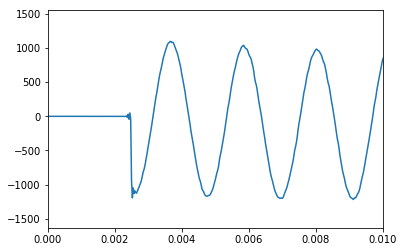

In [27]:
plt.xlim(0,0.01)
plt.plot(t,result)

## Use last NSample points ,,, it is stable
### take data at the last      Nsample * (1/fsam) seconds

In [46]:
NSample/fsam

0.5

In [33]:
NSample=20000
r  =(result.shape[0])-NSample
rr =result.shape[0]

In [34]:
print(r)
print(rr)

99808
119808


### zero pad to totalN points

In [35]:
yy=result[r:rr]

totalN=80000
yyy=np.pad(yy,(0,totalN-NSample),'constant')

In [36]:
len(yyy)

80000

In [37]:
T=1/fsam
stop=(totalN-1)*T
t=np.linspace(0,stop,totalN)

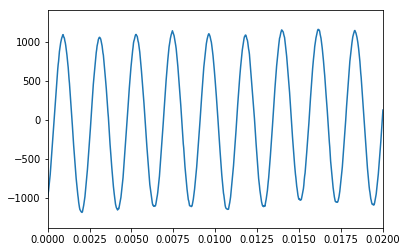

In [38]:
plt.xlim(0,0.02)
plt.plot(t,yyy)

In [39]:
from scipy import fftpack
faX=fftpack.fft(yyy)
Xc=faX*T
Xcabs=np.abs(Xc)

In [40]:
freqs=fftpack.fftfreq(totalN,T)
np.max(Xcabs)

281.2470344393713

In [41]:
peak_result=np.where(Xcabs==np.max(Xcabs))
peak_index=peak_result[0][0]
print('The frequency is :' ,freqs[peak_index])

The frequency is : 459.0


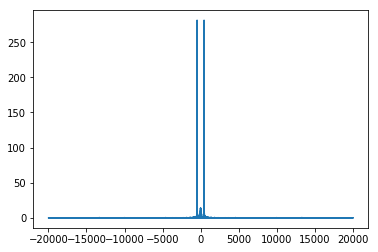

In [42]:
plt.plot(freqs,Xcabs)

In [43]:
with open("microphone-results.wav", "wb") as f:
    f.write(audio_f.get_wav_data())

## use bmp17.exe   to extract the audio data part

In [44]:
!./bmp17.exe  microphone-results.wav

This program is to extract the audio data of the WAV file of microphone-results.wav
and generate the sampled audio values into a file out.data
  0   1   2   3 --- 52  49  46  46  
  4   5   6   7 --- 24  a8  03  00  RIFF chunk size=239652
  8   9  10  11 --- 57  41  56  45  
 12  13  14  15 --- 66  6d  74  20  
 16  17  18  19 --- 10  00  00  00  
 20  21  22  23 --- 01  00  01  00  PCM=1, Num of channel=1
 24  25  26  27 --- 40  9c  00  00  sampling rate fs=40000, Sampling time Ts= 0.0000250
 28  29  30  31 --- 80  38  01  00  byte rate=80000
 32  33  34  35 --- 02  00  10  00  bits per sample=16
 36  37  38  39 --- 64  61  74  61  
 40  41  42  43 --- 00  a8  03  00  audio number of byte=239616
wav file current positon =44
Starting reading data now at this position...!


00  00     0     0
00  00     0     0
00  00     0     0
00  00     0     0
00  00     0     0
00  00     0     0
total readin 119808 data !! each data is two bytes !! 
cause read in tt= 0 less than two bytes!!
total

## compare with the C extraction: 

In [45]:
result[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int16)